# STA130 Homework 8
ChatGPT URL: https://chatgpt.com/share/673fe2a4-f8f4-8002-993f-da2c86dd16e2

<b>#1)</b> A classification decision tree separates possible outcomes, with various types such as a binary classification decision tree in which the outcome can only be something like "true/false", "young/old", etc. A multiclass classification decision tree on the contrary can mean something which can have more than two possible outcomes. Some real world scenarios in which a classification decision tree may be used is in things such as email spam detection or credit scoring. In the example of credit scoring, you can calculate whether or not someone is likely to default on a loan, or pay off their credit card, based off their past history. You could set up a long string of possible things, such as "Has the person missed a payment in the last 6 months?" followed by followup questions like "Do they have income?", "Are they new to having a credit score?" etc. In the end, it enables you to classify a person as "likely to default" or "unlikely to default". The difference between a classification decision tree and a linear regression model is such that a classification decision tree will have a goal of "classifying" people. In the case of a test, a classification decision tree can split things into "is study time > 5 hours" or "is attendance > 80%?" then classify if a student passes or fails. Whereas a linear regression model has the goal of predicting the student's exact score, with a linear equation.

<b>#2) Real world scenarios which each of the following metrics could be used:</b>

Accuracy: Something like weather forecasts in which you can determine if it rains when projected to rain, or no rain when it's projected to not rain. You want a model here to be accurate as it can determine if an individual needs to bring an umbrella or dress appropriately for the weather.

Sensitivity: Something like cancer screening, where it's incredibly important to have as many true positives as possible, regardless of the number of false positives (within reason). It's always safer to test someone and have a true positive, than a false negative. A false negative can give someone a false sense of security and they could suffer and potentially lose their lives as a result, whereas a false positive simply needs to be retested.

Specificity: Email Spam Filtering has a relatively light set of consequences if it fails and does not block a piece of spam email. However, you would never want legitimate emails to be classified as spam, as you could miss crucial pieces of information. As a result, the proportion of actual negatives that are correctly identified is important, as you need the emails which are "negative" for spam to be false and reach the inbox.

Precision: Product recommendation systems can benefit from having high precision, as a higher precision means that you correctly guess what an individual would actually be interested in. I am writing this now as Uber Eats consistently recommends me alcoholic drinks, with ads such as "pssst, running low?" and frankly, I am a prime example of someone who is getting tired of these ads and as a result, have ended up silencing uber notifications. In this case, uber has lost a potential customer due to their precision being relatively low and assuming that I want alcohol, which is not the case.

In [95]:

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [96]:
# Remove specified columns and drop rows with NaN entries
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Explicitly make a copy to avoid chained assignment issues

# Convert 'Pub year' and 'NumPages' to integers
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to category
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the resulting DataFrame info
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The

In [97]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard cover, 0 for Paper back
X = ab_reduced_noNaN[['List Price']]

# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Test set observations: {len(ab_reduced_noNaN_test)}")


Training set observations: 255
Test set observations: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paper Back'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paper Back'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paper Back'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paper Back'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hard Cover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hard Cover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paper Back')]

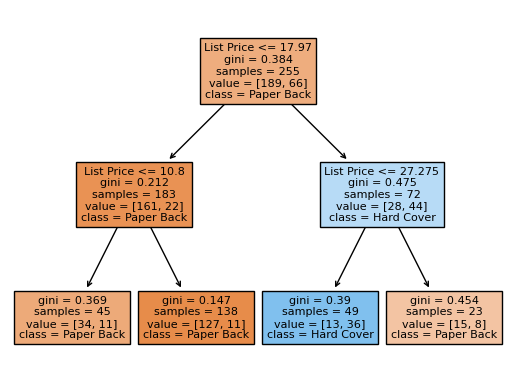

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(ab_reduced_noNaN_train, y_train)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper Back', 'Hard Cover'], filled=True)


<b>#4)</b> The two lines of code do the following:
"y = pd.get_dummies(ab_reduced_noNaN\["Hard_or_Paper"\])\['H'\]" converts the code into binary, where 1 represents hardcover and 0 represents paperback.

"X = ab_reduced_noNaN\[\['List Price'\]\]" chooses that the predictor variable should be the price of the book for the decision tree model. In other words, it wants to use the price of the book to determine whether or not the book will be hardcover or paperback. It trains itself off 20% of the data, determined with the random_state=42 line of code meaning that the code will always be reproducible. It can then use that remaining 80% of data to predict whether or not a book will be hardcover or paperback, the statistics calculated will be shown below by the following line of code:


In [99]:
# Make predictions on the test data
y_pred = clf.predict(ab_reduced_noNaN_test)
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()  # True negatives, false positives, false negatives, true positives

print(f"Confusion Matrix:\n{cm}")
# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")


Confusion Matrix:
[[40  4]
 [ 6 14]]
Accuracy: 0.84
Sensitivity (Recall): 0.70
Specificity: 0.91
Precision: 0.78


As a result of this data, we can see that this model is relatively accurate, with a 86% accuracy, which meant that 84% of the total predictions made by our model were in fact correct. We then saw that unfortunately only about 75% of the true positive cases were correctly identified, so only 75% of hardcover books were correctly identified. However, it was very accurate with the paperback books, correctly identifying 91% of them. Overall, 79% of the books predicted to be hardcover were actually hardcover, and 21% of the books it identified as hardcover were paperback.

## ChatGPT Summary
https://chatgpt.com/share/673fe2a4-f8f4-8002-993f-da2c86dd16e2
Here's a summary of our conversation:

Classification Decision Trees: We discussed classification decision trees, how they work by recursively splitting the data based on feature values, and how they make predictions by choosing the majority class in each leaf.
Metrics Explanation: We talked about different evaluation metrics:
Accuracy measures the proportion of correct predictions.
Sensitivity (Recall) measures the proportion of actual positives correctly identified.
Specificity measures the proportion of actual negatives correctly identified.
Precision measures the proportion of predicted positives that are actually correct.
Data Preprocessing: You shared some steps for preparing your dataset, including dropping columns, handling missing values, and converting columns to appropriate data types. We addressed the SettingWithCopyWarning when modifying a subset of the DataFrame, and I suggested using .loc and .copy() to avoid it.
Model Training: We used train_test_split to split your data into 80% training and 20% test sets, and we discussed how to use the DecisionTreeClassifier with a max_depth of 2 to predict book types (hardcover vs. paperback) based on the List Price.
Model Evaluation: We then discussed how to calculate key metrics for evaluating the model's performance, including accuracy, sensitivity, specificity, and precision. I provided the formulas and code for each metric.
Random Seed: You asked if a random seed was used in splitting the data, and I confirmed it was (random_state=42 in train_test_split), ensuring reproducibility.
Interpretation of Results: You provided model evaluation metrics and asked whether the interpretation was correct. We refined the interpretation based on your stats, explaining how precision, sensitivity, and specificity reflect the model’s performance in terms of false positives and false negatives.
That sums up the key points from this conversation! Let me know if you'd like to dive deeper into any part of it! 😊

# Post Lecture HW
ChatGPT URL: https://chatgpt.com/share/673fe2a4-f8f4-8002-993f-da2c86dd16e2

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Define new features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X, y)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [106]:
ab_reduced_noNaN_train, ab_reduced_noNaN_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

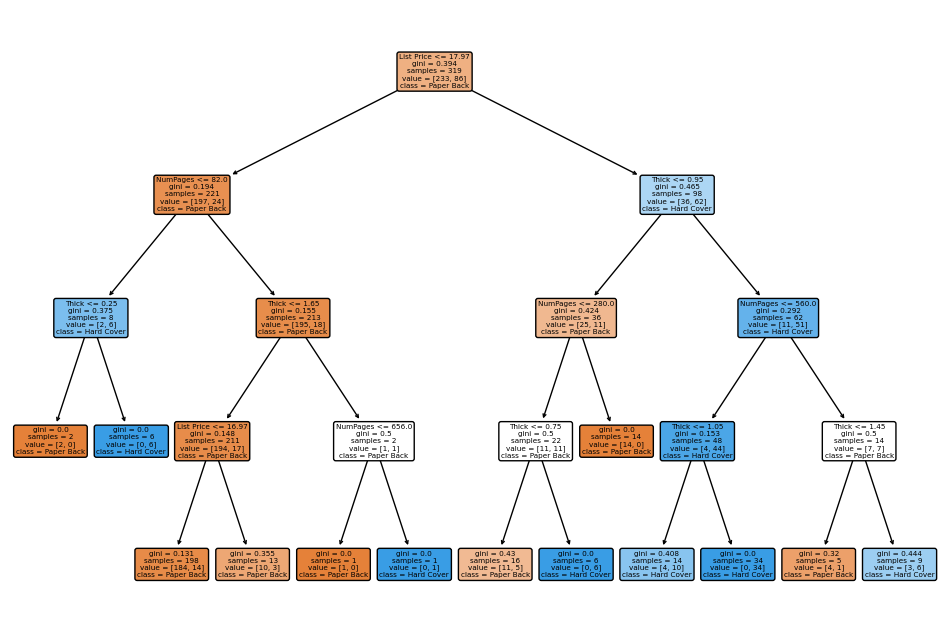

In [107]:
import matplotlib.pyplot as plt

# Visualize the tree
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper Back', 'Hard Cover'], filled=True, rounded=True)
plt.show()


In [108]:
# Make predictions on the test data
y_pred = clf2.predict(ab_reduced_noNaN_test)
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()  # True negatives, false positives, false negatives, true positives

print(f"Confusion Matrix:\n{cm}")
# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")


Confusion Matrix:
[[42  2]
 [ 2 18]]
Accuracy: 0.94
Sensitivity (Recall): 0.90
Specificity: 0.95
Precision: 0.90


<b>#5)</b> The clf2 model is much more accurate than the previous model, with an accuracy of 94% which means that 94% of the things identified were correctly identified. It does better when it comes to specificity, with 95% of paperback books being correctly identified as paperback. However, it is still incredibly good when it comes to its sensitivity, with 90% of the hardcover books being correctly identified as hardcover. This model uses the number of pages, whether or not the book is thick, and the list price to split the data and classify it accordingly. It then goes down the various branches of the tree, ie) left if not thick, right if thick, etc until it reaches a bottom node and outputs the classification obtained from that. 

<b>#6)</b> It has just come to my attention that I have already done #6 for clf and clf2. The data obtained from each of the confusion matrixes will be pasted below:

CLF1:
Confusion Matrix:
[[40  4]
 [ 6 14]]
Accuracy: 0.84
Sensitivity (Recall): 0.70
Specificity: 0.91
Precision: 0.78

CLF2:
Confusion Matrix:
[[42  2]
 [ 2 18]]
Accuracy: 0.94
Sensitivity (Recall): 0.90
Specificity: 0.95
Precision: 0.90

See question 4 and 5 for a brief discussion about each piece of data.

<b>#7)</b> In the two models provided below, the differences can mostly be attributed to what the models are trained on. In the first model (clf1), it is trained entirely on the listing price of the book. As a result, it reports quite a few false negatives and quite a few false positives. However, it is still relatively accurate. On the contary, the second model is trained on quite a bit more, including the number of pages in the book, the thickness, and the listing price. However, despite all of this, the code here uses very default parameters. The two clf models made in questions 4 and 5 have customized model depths, pieces of specific data, etc. As a result, the two clf models are made with a lot more customization specific to the data, and have much more fine tuning. As such, they are generally better. I initially ran this code and upon attempting to rerun it, it is giving me an assortment of errors and despite over an hour of troubleshooting with ChatGPT, repeating conversations, etc, I cannot identify the error. 

In [112]:
# Access the feature importances of clf2
importances = clf2.feature_importances_


In [113]:
# Get the feature names
feature_names = clf2.feature_names_in_


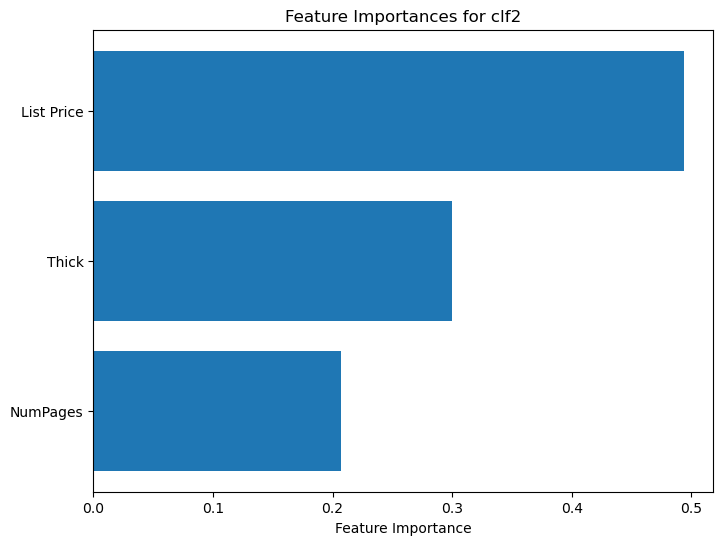

In [114]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2')
plt.show()


In [115]:
# Find the most important feature
most_important_feature = feature_names[importances.argmax()]
print(f"The most important predictor variable is: {most_important_feature}")


The most important predictor variable is: List Price


<b>#8)</b> As shown above, the most important predictor variable for clf2 is list price, followed by the thickness and finally followed by the number of pages. With this ,we can see that using just the list price provides a relatively accuracy, which is further tuned by thickness and finally, the number of pages.

<b>#9)</b> The coefficients used in linear regression vs feature importances in decisions trees both are basically the importance of each predictor variable. However, one of the major differences is just that the coefficient directly measures how important each predictor variable is. In question 8, the price of the book would have a substantially larger coefficient than something like the number of pages, whereas in a classification tree, it's simply a "is it greater than this value? if so, assume this", and it uses that information to split each branch accordingly.


<b>#10)</b> Yes

## Chatbot Summary
https://chatgpt.com/share/673fe2a4-f8f4-8002-993f-da2c86dd16e2
In this conversation, we covered several aspects of working with decision trees and evaluating models:

Data Preparation and Model Fitting: You worked on preprocessing a dataset by cleaning it, handling missing values, converting columns to the correct data types, and splitting the data into training and test sets. You then trained a classification decision tree (clf) and explored how it makes predictions based on the List Price variable using a max depth of 2. You also created a second classification tree (clf2) with additional features (NumPages, Thick, and List Price), setting the max depth to 4.
Evaluation of Model Performance: We discussed how to evaluate model performance using metrics like accuracy, sensitivity, specificity, and precision. You calculated these metrics for both clf and clf2 on the test dataset and visualized confusion matrices to understand the models' predictive behavior.
Visualizing the Model: You learned how to visualize the decision trees using tree.plot_tree() for both clf and clf2 and interpreted their structure. We also explored how to assess feature importance by accessing the .feature_importances_ attribute in decision trees and visualizing the contribution of each predictor.
Key Differences Between Linear Models and Decision Trees: We compared how coefficients in linear regression represent direct relationships between predictors and outcomes, while feature importances in decision trees highlight the relative influence of each predictor variable on model decisions but do not provide a direct relationship.
This conversation has focused on model training, evaluation, and interpretation, with a special emphasis on decision trees in classification tasks and understanding their inner workings and output.